In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [3]:
img_height = 1681
img_width = 1121
batch_size = 32

In [4]:
ds_train_grey = tf.keras.preprocessing.image_dataset_from_directory('E:/Python Projekt 5_2 Extraktion/MLME_ExtractionClassification/',color_mode="grayscale", batch_size = batch_size,
                                                              image_size = (img_height, img_width),seed = 123, validation_split = 0.2, subset = 'training',)
ds_validation_grey = tf.keras.preprocessing.image_dataset_from_directory('E:/Python Projekt 5_2 Extraktion/MLME_ExtractionClassification/',color_mode="grayscale", batch_size = batch_size,
                                                              image_size = (img_height, img_width),seed = 123, validation_split = 0.2, subset = 'validation',)
#ändern des Pfades nötig

Found 5158 files belonging to 2 classes.
Using 4127 files for training.
Found 5158 files belonging to 2 classes.
Using 1031 files for validation.


['Flooding', 'Regular_State']


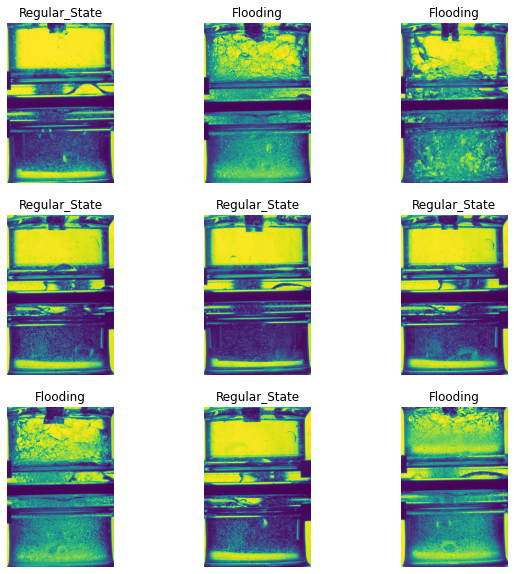

In [5]:
class_names = ds_train_grey.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in ds_train_grey.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
#beispiel Bilder anzeigen lassen. Die Bilder sind theoretisch in 'greyscale'

In [6]:
ds_train_grey.take(1)

<TakeDataset shapes: ((None, 1681, 1121, 1), (None,)), types: (tf.float32, tf.int32)>

In [7]:
for image_batch, labels_batch in ds_train_grey:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 1681, 1121, 1)
(32,)


In [8]:
train_grey = image_batch.numpy()
train_grey.shape
#eigentlich unnötig

(32, 1681, 1121, 1)

In [9]:
num_classes = 2
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
#beispiel CNN ausm Internet: https://www.tensorflow.org/tutorials/images/classification


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
model.summary()


#AUTOTUNE = tf.data.AUTOTUNE
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 1681, 1121, 1)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1681, 1121, 16)    160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 840, 560, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 840, 560, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 420, 280, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 420, 280, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 210, 140, 64)      0

AttributeError: module 'tensorflow._api.v2.data' has no attribute 'AUTOTUNE'

In [12]:
epochs=3
history = model.fit(
  ds_train_grey,
  validation_data=ds_validation_grey,
  epochs=epochs
)


Epoch 1/3
  6/129 [>.............................] - ETA: 1:19:53 - loss: 30.0504 - accuracy: 0.5677

KeyboardInterrupt: 